<a href="https://colab.research.google.com/github/vishrutss/LLM_assignment_3/blob/main/LLM_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3: Multilingual Large Language Models**

## **Submitted by: Vishrut Sharma**

# 1) **Dataset Annotation**
## **Dataset Creation:**
* The dataset consists of sentiment analysis data from Twitter in 8 different languages.

* It was designed to support tasks like text classification, specifically sentiment classification.

* The data is split into training, validation, and test sets across all included languages.

## **Potential weaknesses in annotation**
* Subjectivity: Sentiment analysis can be subjective, and different annotators might interpret the sentiment of tweets differently.

* Context Dependence: Tweets often contain slang, irony, or cultural references, which can be challenging to interpret correctly without additional context.

* Language Nuances: With multiple languages involved, there’s a risk of misinterpreting sentiments due to language-specific nuances and expressions.

* For example: The following tweet "Listen to #NBAwards Winner @user interview on @user" was given a positive sentiment. I feel that this tweet has a neutral sentiment because the tweet is just asking users to listen to an interview. But because the word winner is included in the tweet the annotator might have felt giving it a positive sentiment is appropriate.

# 2) **Language diversity**
## **Predicted Performance (Best to Worst)**
* English: English is likely to perform best due to its vast online presence and abundance of training data available beyond this dataset.

* Spanish: Spanish also has a significant online presence and shares some cultural and linguistic roots with Portuguese, potentially benefiting from some transfer learning within the model.

* French, German, Portuguese, Italian: These European languages have a decent online presence and might perform similarly. The model might leverage some similarities within these languages (French, Italian, Portuguese) for better performance.

* Hindi: Hindi might perform slightly lower due to a potentially smaller online presence compared to the other languages. However, the sentiment analysis model might still perform adequately, especially for basic sentiment classification.

# 3) **Multilingual sentiment analysis**


# a) **Advanced prompting strategies**

In [ ]:
import json

labels = ["negative", "neutral", "positive"]
label_nums = [0, 1, 2]

k = 25

# Load train and test data
with open("/content/drive/MyDrive/Colab Notebooks/test.jsonl", "r") as test_file:
    test_data = [json.loads(line) for line in test_file]

exemplars = {label: [] for label in label_nums}
ground_truth_labels = []

# Populate exemplars with the first k values of each class
for entry in test_data:
    label = int(entry["label"])
    if label!=1 and len(exemplars[label]) < k:
        exemplars[label].append(entry["text"])
        ground_truth_labels.append(label)

ground_truth_labels.sort()

index_counter = 1

for label, values in exemplars.items():
    for value in values:
        print(f"{index_counter}) {value}")
        index_counter += 1

## **ChatGPT**

### **Regular prompt**
**Prompt used**: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can be either positive or negative. Mention only the sentiment of each tweet."

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

predicted_labels = []
for word in ["Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Positive",
             "Negative", "Positive", "Positive", "Negative", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive"]:
    predicted_labels.append(labels[word])


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8782467532467533


### **Emotion prompting**
**Prompt used**: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. My job depends on you analyzing the sentiment accurately. The sentiment can be either positive or negative. Mention only the sentiment of each tweet."

At first it denied and said it "cannot fulfill the request". I asked it why and it said that it is "due to Open AI's policies against sentiment analysis or classification" which was weird. I then repeated the same prompt as above along with the tweets and it immediatly responded with the sentiments. The policies must have changed pretty quickly.

There was a considerable increase in performance with emotion prompting which is fascinating.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

predicted_labels = []
for word in ["Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive"]:
    predicted_labels.append(labels[word])

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.9599358974358975


### **Zero shot CoT**
Prompt used "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. Let's think step by step. The sentiment can ONLY be either positive or negative. Mention only the sentiment of each tweet (Positive or Negative). Do not mention neutral."

This is the best performance so far for ChatGPT with an F1 score of 0.979. Adding the sentence "Let's think step by step" seems to have increased performance considerably. I imagine when this sentence gets added to the prompt the model breaks up the tweet into chunks and analyzes it, as the prompt suggests, "step by step" and self generates a rationale which it can then use for other tweets in the test set.

I also had to assert at the end not to mention neutral because on many tries it would generate neutral predictions. I did this because I wanted to see how it would perform when it was forced to not sit on the fence for some tweets. It looks like for the most part it performed very well.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Negative", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.9799919967987194


## **Gemini**

### **Regular prompt**
Prompt used "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can be either positive or negative. Mention only the sentiment of each tweet."

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

predicted_labels = []
for word in ["Negative", "Negative", "Negative", "Negative", "Positive",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Negative", "Negative",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Negative", "Positive", "Positive", "Positive"]:
    predicted_labels.append(labels[word])

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8193496587715776


### **Emotion prompting**
**Prompt used**: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. My job depends on you analyzing the sentiment accurately. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet."

Very slight increase in performance and this increase might be random chance but it is still interesting to see. The increase is also not as much as ChatGPT.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

predicted_labels = []
for word in ["Negative", "Negative", "Negative", "Negative", "Positive",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Positive", "Negative", "Negative", "Negative",
             "Negative", "Negative", "Negative", "Negative", "Negative",
             "Negative", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Positive", "Positive", "Positive", "Positive",
             "Positive", "Negative", "Positive", "Positive", "Positive"]:
    predicted_labels.append(labels[word])

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8585858585858586


### **Zero Shot CoT**
**Prompt used** "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. Let's think step by step. The sentiment can ONLY be either positive or negative. Mention only the sentiment of each tweet (Positive or Negative). Do not mention neutral."

Similar to ChatGPT using zero shot CoT prompting has increased the performance in Gemini. Although it is still a small increase as compared to ChatGPT it is nevertheless an increase.

This is also the best performance for gemini so far with an F1 score of 0.899

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Negative", "Negative", "Negative", "Negative", "Positive",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Negative", "Positive", "Negative", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Negative", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8999599839935974


### **Graph plot**

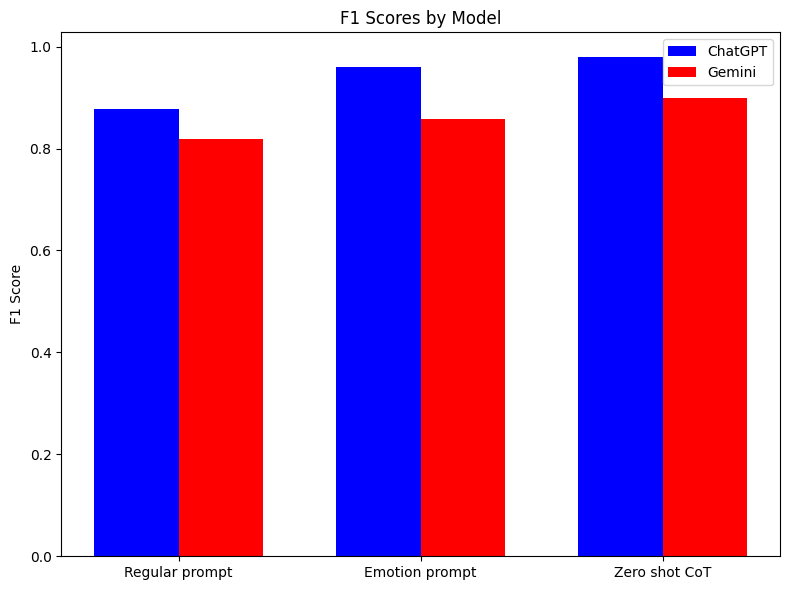

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

prompt_styles = ["Regular prompt", "Emotion prompt", "Zero shot CoT"]
chatgpt_f1_scores = [0.878, 0.959, 0.979]
gemini_f1_scores = [0.819, 0.858, 0.899]

f1_scores = chatgpt_f1_scores + gemini_f1_scores

x = np.arange(len(prompt_styles))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x - width/2, chatgpt_f1_scores, width, label='ChatGPT', color='blue')
ax.bar(x + width/2, gemini_f1_scores, width, label='Gemini', color='red')

ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(prompt_styles)
ax.legend()

plt.tight_layout()
plt.show()

# b) **Multilingual prompting**

In [ ]:
import json

labels = ["negative", "neutral", "positive"]
label_nums = [0, 1, 2]

k = 25

# Load train and test data. Change according to need
with open("/content/drive/MyDrive/Colab Notebooks/es_test.jsonl", "r") as test_file:
    test_data = [json.loads(line) for line in test_file]

exemplars = {label: [] for label in label_nums}
ground_truth_labels = []

# Populate exemplars with the first k values of each class
for entry in test_data:
    label = int(entry["label"])
    if label!=1 and len(exemplars[label]) < k:
        exemplars[label].append(entry["text"])
        ground_truth_labels.append(label)

ground_truth_labels.sort()

index_counter = 1

for label, values in exemplars.items():
    for value in values:
        print(f"{index_counter}) {value}")
        index_counter += 1

## **ChatGPT**

### **English prompt with german test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet.
Remember there are 50 tweets:"

An interesting thing about the prompt I used is that I had to remind ChatGPT that I provided 50 tweets as it consistently only produced sentiments for 48-49 tweets.

Nevertheless the performance seems to be very good with an english prompt.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

predicted_labels = []
for value in ["Negative", "Negative", "Negative", "Negative", "Positive",
              "Negative", "Negative", "Negative", "Negative", "Negative",
              "Negative", "Negative", "Negative", "Negative", "Negative",
              "Negative", "Negative", "Negative", "Negative", "Negative",
              "Negative", "Negative", "Negative", "Positive", "Positive",
              "Positive", "Positive", "Positive", "Positive", "Positive",
              "Positive", "Positive", "Positive", "Positive", "Positive",
              "Positive", "Negative", "Positive", "Positive", "Positive",
              "Positive", "Positive", "Positive", "Positive", "Positive",
              "Positive", "Positive", "Negative", "Positive", "Negative"]:
    predicted_labels.append(labels[value])

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.88


### **German prompt with german test set**
**Prompt used**: "Fungieren Sie als Stimmungsanalysator. Analysieren Sie für jeden der folgenden 50 Tweets die Stimmung. Die Stimmung kann nur entweder positiv oder negativ sein. Erwähnen Sie nur die Stimmung jedes Tweets.
Denken Sie daran, es gibt 50 Tweets:"

The prompt was translated using google translate.

Giving a prompt in german for the german test set massively improved the F1 score. What is surprising to me is that this performance is better than the english prompt used for the english test set in the previous section which has an F1-score of 0.878. This might have been a random occurrence but it is still very interesting.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negativ": 0, "Positiv": 2}

predicted_labels = []
for value in ["Negativ", "Negativ", "Negativ", "Negativ", "Negativ",
              "Negativ", "Negativ", "Negativ", "Negativ", "Negativ",
              "Negativ", "Negativ", "Negativ", "Negativ", "Negativ",
              "Negativ", "Negativ", "Negativ", "Negativ", "Negativ",
              "Negativ", "Negativ", "Negativ", "Negativ", "Positiv",
              "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
              "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
              "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
              "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
              "Positiv", "Positiv", "Positiv", "Positiv", "Negativ"]:
    predicted_labels.append(labels[value])

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.96


### **English prompt with French test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. Mention only the sentiment of each tweet (Positive or Negative). Do NOT mention Neutral. Remember there are 50 tweets."

I was very surprised at the low performance of ChatGPT on the French dataset. I imagined the performance would be at least on par with English because French is also a high resource language.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Negative", "Negative", "Positive",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Positive", "Positive", "Negative", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Negative", "Positive", "Negative",
    "Negative", "Negative", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Negative", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.7181964573268921


### **French prompt with French test set**
Prompt used: "Agir en tant qu’analyseur de sentiments. Pour chacun des 50 tweets suivants, analysez le sentiment. Mentionnez uniquement le sentiment de chaque tweet (positif ou négatif). Ne mentionnez PAS Neutre. N'oubliez pas qu'il y a 50 tweets."

The prompt was translated using google translate.

A small increase in performance is seen when a french prompt is used on the dataset. But this is still one of the weakest performances by ChatGPT.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Négatif": 0, "Positif": 2}

values = [
    "Négatif", "Négatif", "Négatif", "Négatif", "Négatif",
    "Négatif", "Négatif", "Positif", "Négatif", "Négatif",
    "Positif", "Positif", "Négatif", "Négatif", "Positif",
    "Négatif", "Négatif", "Négatif", "Négatif", "Négatif",
    "Négatif", "Positif", "Positif", "Négatif", "Positif",
    "Positif", "Positif", "Positif", "Positif", "Positif",
    "Positif", "Positif", "Négatif", "Positif", "Négatif",
    "Négatif", "Négatif", "Positif", "Positif", "Positif",
    "Positif", "Positif", "Négatif", "Positif", "Positif",
    "Positif", "Positif", "Positif", "Positif", "Positif"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.7596153846153846


### **English prompt with Hindi test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. Mention only the sentiment of each tweet (Positive or Negative). Do NOT mention Neutral. Remember there are 50 tweets."

Even with specific instructions the model predicted neutral for a few tweets which caused the F1 score to be fairly average.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Neutral":1, "Positive": 2}

values = [
    "Negative", "Negative", "Negative", "Neutral", "Negative",
    "Negative", "Negative", "Neutral", "Neutral", "Negative",
    "Neutral", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Neutral", "Negative",
    "Positive", "Positive", "Negative", "Negative", "Neutral",
    "Neutral", "Neutral", "Positive", "Positive", "Positive",
    "Positive", "Negative", "Negative", "Positive", "Positive",
    "Positive", "Neutral", "Positive", "Positive", "Neutral",
    "Neutral", "Neutral", "Positive", "Negative", "Positive"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.7421052631578948


### **Hindi prompt with Hindi test set**
Prompt used: "ek bhaavana vishleshak ke roop mein kaary karen. nimnalikhit 50 tveets mein se pratyek ke lie bhaavana ka vishleshan karen. pratyek tveet kee bhaavana (sakaaraatmak ya nakaaraatmak) ka hee ullekh karen. tatasth ka ullekh na karen. yaad rakhen 50 tveet hain."

The prompt was translated using google translate.

There is a good increase in performance when Hindi prompt is used. An interesting observation I had was the model started to explain the reason for each sentiment prediction even though I had not prompted it to.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Nakaaraatmak": 0, "Sakaaraatmak": 2}

values = [
    "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak",
    "Nakaaraatmak", "Nakaaraatmak", "Sakaaraatmak", "Sakaaraatmak", "Nakaaraatmak",
    "Sakaaraatmak", "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak",
    "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak",
    "Nakaaraatmak", "Nakaaraatmak", "Nakaaraatmak", "Sakaaraatmak", "Nakaaraatmak",
    "Sakaaraatmak", "Sakaaraatmak", "Sakaaraatmak", "Sakaaraatmak", "Sakaaraatmak",
    "Sakaaraatmak", "Sakaaraatmak", "Sakaaraatmak", "Sakaaraatmak", "Sakaaraatmak",
    "Sakaaraatmak", "Sakaaraatmak", "Nakaaraatmak", "Sakaaraatmak", "Sakaaraatmak",
    "Sakaaraatmak", "Nakaaraatmak", "Sakaaraatmak", "Sakaaraatmak", "Nakaaraatmak",
    "Nakaaraatmak", "Sakaaraatmak", "Sakaaraatmak", "Nakaaraatmak", "Sakaaraatmak"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8199279711884754


### **English Prompt Italian test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet. Remember there are 50 tweets:
"

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Positive",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Positive", "Negative", "Negative",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Negative", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Negative", "Positive", "Positive",
    "Positive", "Positive", "Negative", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8999599839935974


### **Italian prompt Italian test set**
Prompt used: "Agire come un analizzatore del sentiment. Per ognuno dei successivi 50 tweet analizziamo il sentiment. Il sentimento può essere solo positivo o negativo. Menziona solo il sentimento di ogni tweet. Ricorda che ci sono 50 tweet:"

The prompt was translated using google translate.

A slight decrease in performance when compared to the english prompt.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negativo": 0, "Positivo": 2}

values = [
    "Negativo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Positivo", "Negativo", "Negativo", "Positivo",
    "Negativo", "Positivo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Positivo", "Negativo", "Negativo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Negativo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Negativo", "Positivo", "Positivo"
]

predicted_labels = [labels[value] for value in values]


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8798076923076923


### **English Prompt Portuguese test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet. Remember there are 50 tweets:
"

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Positive", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Positive", "Negative", "Negative",
    "Negative", "Positive", "Negative", "Negative", "Negative",
    "Negative", "Positive", "Negative", "Negative", "Positive",
    "Negative", "Negative", "Negative", "Negative", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8782467532467533


### **Portuguese prompt Portuguese test set**
Prompt used: "Atuar como um analisador de sentimento. Para cada um dos 50 tweets a seguir, analise o sentimento. O sentimento só pode ser positivo ou negativo. Mencione apenas o sentimento de cada tweet. Lembre-se de que existem 50 tweets:"

The prompt was translated using google translate.

Similar to Italian a slight decrease in performance when compared to the english prompt.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negativo": 0, "Positivo": 2}

values = [
    "Positivo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Positivo", "Positivo", "Negativo",
    "Negativo", "Positivo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Positivo", "Negativo", "Negativo", "Positivo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8572011423908609


### **English Prompt Spanish test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet. Remember there are 50 tweets:
"

Perfect sentiment prediction.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 1.0


### **Spanish Prompt Spanish test set**

Prompt used: "Actuar como analizador de sentimientos. Para cada uno de los siguientes 50 tweets, analice el sentimiento. El sentimiento sólo puede ser positivo o negativo. Mencione solo el sentimiento de cada tweet. Recuerda que son 50 tweets:"

The prompt was translated using google translate.

A considerable decrease in performance when spanish prompt is used.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negativo": 0, "Positivo": 2}

values = [
    "Positivo", "Negativo", "Negativo", "Positivo", "Negativo",
    "Negativo", "Negativo", "Positivo", "Negativo", "Positivo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Positivo", "Negativo", "Negativo", "Negativo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Negativo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Negativo", "Positivo", "Positivo", "Positivo", "Positivo"
]

predicted_labels = [labels[value] for value in values]


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8389694041867954


## **Gemini**

### **English prompt with german test set**
**Prompt used**: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet in the provided order."

When I gave gemini this prompt it generated 2 drafts. The first draft contained neutral predictions as well even though I specifically mentioned in the prompt that the sentiment can only be either positive or negative.

The second draft gave me the expected output. Although it performed much worse than ChatGPT. And this is an interesting thing about Gemini which is that it can generate multiple drafts which have varied performance and results.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

predicted_labels = []
values = ["Negative", "Positive", "Negative", "Negative", "Negative",
          "Negative", "Negative", "Positive", "Negative", "Negative",
          "Negative", "Negative", "Negative", "Positive", "Negative",
          "Negative", "Negative", "Negative", "Negative", "Positive",
          "Positive", "Positive", "Positive", "Negative", "Positive",
          "Positive", "Negative", "Positive", "Negative", "Positive",
          "Negative", "Positive", "Positive", "Positive", "Positive",
          "Positive", "Positive", "Positive", "Positive", "Positive",
          "Positive", "Positive", "Positive", "Positive", "Positive",
          "Positive", "Positive", "Positive", "Positive", "Positive"]

for value in values:
    predicted_labels.append(labels[value])

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.7777777777777779


### **German prompt with german test set:**
**Prompt used**: "Fungieren Sie als Stimmungsanalysator. Analysieren Sie für jeden der folgenden 50 Tweets die Stimmung. Die Stimmung kann nur entweder positiv oder negativ sein. Erwähnen Sie nur die Stimmung jedes Tweets."

The prompt was translated using google translate.

Compared to ChatGPT the prompt being in the same language did not really help with the performance for Gemini. This could mean that regardless of the language used Gemini performs at about the same level. This could be a good thing in the sense that the user need not know the language of the dataset or text they want to analyze to get better performance.

But I would still prefer ChatGPT because even with an English prompt for the german test set it outperforms Gemini comfortably.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negativ": 0, "Positiv": 2}

predicted_labels = []
values = ["Positiv", "Negativ", "Negativ", "Negativ", "Negativ",
          "Negativ", "Negativ", "Positiv", "Negativ", "Negativ",
          "Negativ", "Positiv", "Negativ", "Negativ", "Negativ",
          "Negativ", "Negativ", "Positiv", "Negativ", "Positiv",
          "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
          "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
          "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
          "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
          "Positiv", "Positiv", "Positiv", "Positiv", "Positiv",
          "Positiv", "Positiv", "Positiv", "Positiv", "Positiv"]

for value in values:
    predicted_labels.append(labels[value])

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.7916666666666665


### **English prompt with French test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. Mention only the sentiment of each tweet (Positive or Negative). Do NOT mention Neutral. Remember there are 50 tweets."

An interesting observation is that even though I provided the prompt in english the model responded in French. ChatGPT had responded in english but Gemini seems to assume that I expect an answer in French because there is a lot of French text present.

The performance is still very poor for French in Gemini as well. The model also generated some neutral prediction even with specific instructions not to which is interesting.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Négatif": 0, "Neutre": 1, "Positif": 2}

values = [
    "Négatif", "Négatif", "Négatif", "Négatif", "Négatif",
    "Négatif", "Négatif", "Positif", "Négatif", "Négatif",
    "Positif", "Positif", "Négatif", "Négatif", "Positif",
    "Négatif", "Négatif", "Négatif", "Négatif", "Négatif",
    "Négatif", "Positif", "Négatif", "Négatif", "Positif",
    "Positif", "Neutre", "Positif", "Positif", "Négatif",
    "Positif", "Positif", "Négatif", "Positif", "Négatif",
    "Négatif", "Négatif", "Positif", "Neutre", "Négatif",
    "Positif", "Positif", "Négatif", "Positif", "Positif",
    "Positif", "Positif", "Positif", "Neutre", "Positif"
]

predicted_labels = [labels[value] for value in values]


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.6986359761295823


### **French prompt with French test set**
Prompt used: "Agir en tant qu’analyseur de sentiments. Pour chacun des 50 tweets suivants, analysez le sentiment. Mentionnez uniquement le sentiment de chaque tweet (positif ou négatif). Ne mentionnez PAS Neutre. N'oubliez pas qu'il y a 50 tweets."

The prompt was translated using google translate.

Almost the same level of performance is seen even when a French prompt is used. The same behaviour present in German seems to be present here as well which is that regardless of the language used for the prompt the performance will generally be the same.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Négatif": 0, "Neutre": 1, "Positif": 2}

values = [
    "Négatif", "Négatif", "Négatif", "Négatif", "Négatif",
    "Négatif", "Négatif", "Positif", "Négatif", "Négatif",
    "Positif", "Positif", "Négatif", "Négatif", "Positif",
    "Négatif", "Négatif", "Négatif", "Négatif", "Négatif",
    "Négatif", "Positif", "Négatif", "Négatif", "Positif",
    "Positif", "Neutre", "Positif", "Positif", "Négatif",
    "Positif", "Neutre", "Négatif", "Positif", "Négatif",
    "Neutre", "Négatif", "Positif", "Neutre", "Négatif",
    "Positif", "Positif", "Négatif", "Positif", "Positif",
    "Positif", "Positif", "Positif", "Neutre", "Positif"
]

predicted_labels = [labels[value] for value in values]


f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.6911111111111111


### **English prompt with Hindi test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. Mention only the sentiment of each tweet (Positive or Negative). Do NOT mention Neutral. Remember there are 50 tweets."

After trying multiple times and opening new chats as well Gemini refuses to analyze the sentiment of the tweets stating: "Mujhe is vishay mein madad karne ke liye program nahin kiya gaya hai." which translates to "I am not programmed to help with this topic".

### **Hindi prompt with Hindi test set**
Prompt used: "ek bhaavana vishleshak ke roop mein kaary karen. nimnalikhit 50 tveets mein se pratyek ke lie bhaavana ka vishleshan karen. pratyek tveet kee bhaavana (sakaaraatmak ya nakaaraatmak) ka hee ullekh karen. tatasth ka ullekh na karen. yaad rakhen 50 tveet hain."

As expected Gemini again refuses to analyze the sentiment of the tweets stating "Main ismein aapki madad nahin kar sakta, kyunki main sirf ek language model hoon aur mujhe is vishay ke baare mein zaroori jaankari nahin hai." which translates to "I cannot help you with this, because I am just a Language model and I do not have the necessary information on this topic"

I wonder if this is because Hindi is a relatively low resource language when compared to the other languages in the dataset and Google just doesn't want to risk generating incorrect responses for tasks like sentiment analysis and just has Gemini refuse the task.

### **English Prompt Italian test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet. Remember there are 50 tweets:
"

Similar to Hindi Gemini denied the request stating "Non posso aiutarti, poiché sono solo un modello linguistico e non ho la capacità di elaborare e comprendere questa richiesta." which translates to "I cannot help you, as I am only a language model and do not have the ability to process and understand this request."

### **Italian prompt Italian test set**
Prompt used: "Agire come un analizzatore del sentiment. Per ognuno dei successivi 50 tweet analizziamo il sentiment. Il sentimento può essere solo positivo o negativo. Menziona solo il sentimento di ogni tweet. Ricorda che ci sono 50 tweet:"

As expected the model denied the request stating "Come modello linguistico, non posso aiutarti in questo caso." which translates to "As a language model, I can't help you in this case."

### **English Prompt Portuguese test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet. Remember there are 50 tweets:
"

This is the best performance by Gemini so far across all languages.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Positive", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Positive", "Negative", "Negative",
    "Negative", "Positive", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.9194847020933977


### **Portuguese prompt Portuguese test set**
Prompt used: "Atuar como um analisador de sentimento. Para cada um dos 50 tweets a seguir, analise o sentimento. O sentimento só pode ser positivo ou negativo. Mencione apenas o sentimento de cada tweet. Lembre-se de que existem 50 tweets:"

The prompt was translated using google translate.

Similar to ChatGPT a slight decrease in performance when compared to the english prompt.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negativo": 0, "Positivo": 2}

values = [
    "Positivo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Positivo", "Negativo", "Negativo",
    "Negativo", "Positivo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Positivo", "Negativo", "Negativo", "Positivo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8782467532467533


### **English Prompt Spanish test set**
Prompt used: "Act as a sentiment analyzer. For each of the following 50 tweets analyze the sentiment. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet. Remember there are 50 tweets:
"

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Positive", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Positive", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Positive", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Negative", "Positive", "Positive", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.8996386993175431


### **Spanish Prompt Spanish test set**

Prompt used: "Actuar como analizador de sentimientos. Para cada uno de los siguientes 50 tweets, analice el sentimiento. El sentimiento sólo puede ser positivo o negativo. Mencione solo el sentimiento de cada tweet (Positivo o Negativo). Recuerda que son 50 tweets:"

The prompt was translated using google translate.

A slight increase in performance compared to the english prompt.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negativo": 0, "Positivo": 2}

values = [
    "Positivo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Negativo", "Positivo", "Negativo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Negativo",
    "Negativo", "Negativo", "Negativo", "Negativo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Positivo", "Positivo", "Positivo", "Positivo", "Positivo",
    "Negativo", "Positivo", "Positivo", "Positivo", "Positivo"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.9198717948717947


## **Graph plot and analysis**
**German**: German prompt performed better than English prompt in ChatGPT. Both around the same in Gemini.

**French**: French prompt performed better than English prompt in ChatGPT. Both around the same in Gemini.

**Hindi**: Hindi prompt performed better than English prompt in ChatGPT. Denied request in Gemini.

**Italian**: English prompt performed slightly better than Italian prompt in ChatGPT. Denied request in Gemini.

**Portuguese**: English prompt performed slightly better for both models.

**Spanish**: English prompt performed better than Spanish prompt in ChatGPT. Spanish prompt performed slightly better for Gemini.

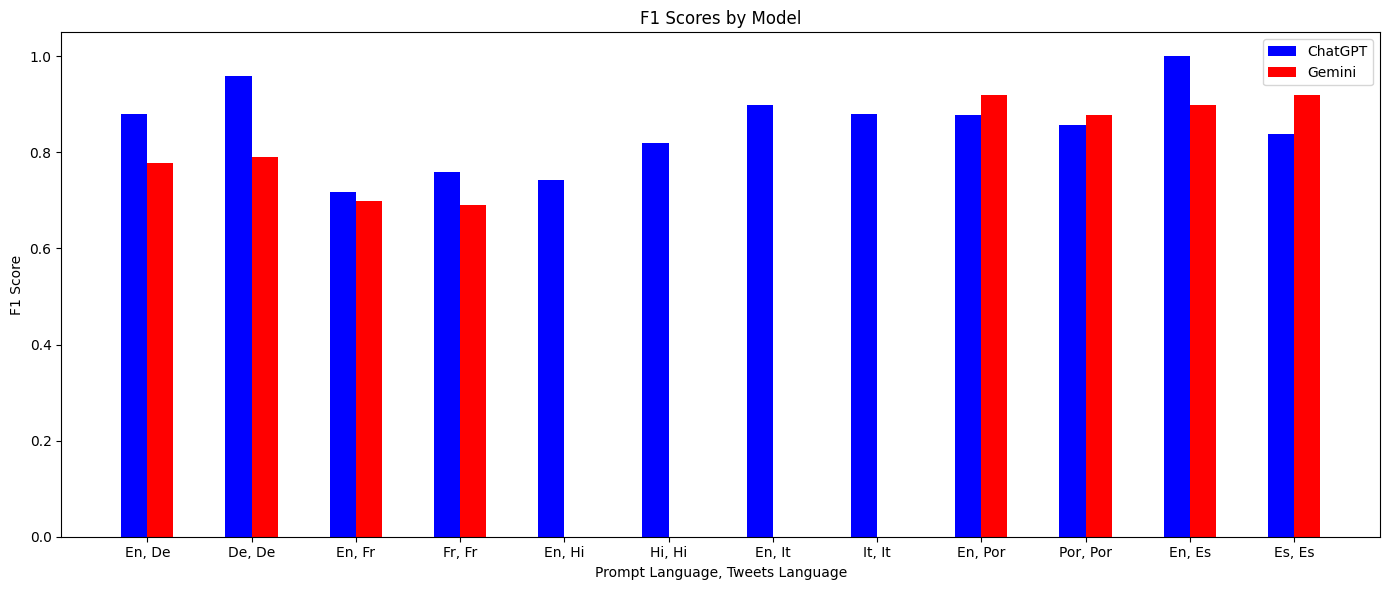

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

prompt_styles = ["En, De", "De, De",
                 "En, Fr", "Fr, Fr",
                 "En, Hi", "Hi, Hi",
                 "En, It", "It, It",
                 "En, Por", "Por, Por",
                 "En, Es", "Es, Es"]
chatgpt_f1_scores = [0.88, 0.96, 0.718, 0.759, 0.742, 0.819, 0.899, 0.879, 0.878,
                     0.857, 1.0, 0.838]
gemini_f1_scores = [0.777, 0.791, 0.698, 0.691, 0, 0, 0, 0, 0.919, 0.878, 0.899,
                    0.919]

x = np.arange(len(prompt_styles))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - width/2, chatgpt_f1_scores, width, label='ChatGPT', color='blue')
ax.bar(x + width/2, gemini_f1_scores, width, label='Gemini', color='red')

ax.set_ylabel('F1 Score')
ax.set_xlabel('Prompt Language, Tweets Language')
ax.set_title('F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(prompt_styles)
ax.legend()

plt.tight_layout()
plt.show()

# **c) Few-shot in-context learning**

In [ ]:
import json

labels = ["negative", "neutral", "positive"]
label_nums = [0, 1, 2]

k_test = 25
k_train = 4

# Load train and test data
with open("/content/drive/MyDrive/Colab Notebooks/test.jsonl", "r") as test_file, open("/content/drive/MyDrive/Colab Notebooks/train.jsonl", "r") as train_file:
    test_data = [json.loads(line) for line in test_file]
    train_data = [json.loads(line) for line in train_file]

exemplars_test = {label: [] for label in label_nums}
exemplars_train = {label: [] for label in label_nums}
ground_truth_labels = []

# Populate exemplars with the first k values of each class
for entry in test_data:
    label = int(entry["label"])
    if label!=1 and len(exemplars_test[label]) < k_test:
        exemplars_test[label].append(entry["text"])
        ground_truth_labels.append(label)

for entry in train_data:
    label = int(entry["label"])
    if label!=1 and len(exemplars_train[label]) < k_train:
        exemplars_train[label].append(entry["text"] + " Sentiment is " + labels[label])

ground_truth_labels.sort()

print("Test Set\n")
index_counter = 1

for label, values in exemplars_test.items():
    for value in values:
        print(f"{index_counter}) {value}")
        index_counter += 1

print("\nTrain Set\n")
index_counter = 1

for label, values in exemplars_train.items():
    for value in values:
        print(f"{index_counter}) {value}")
        index_counter += 1

## **ChatGPT**
**Prompt used**: "Act as a sentiment analyzer. Consider the following examples: {train set examples}. Now analyze the sentiment of the 50 tweets provided below. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet in the provided order."

There is a considerable decrease in performance when I provided the model with examples. This behaviour seems consistent with the BLOOM models where I observed a similar decrease in performance when I provided examples to the model.

This decrease in performance could also be random chance or the prompt used might not have been effective and might have confused the model.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = ["Negative", "Negative", "Negative", "Negative", "Positive",
          "Positive", "Negative", "Negative", "Negative", "Negative",
          "Negative", "Negative", "Negative", "Negative", "Negative",
          "Negative", "Negative", "Negative", "Negative", "Negative",
          "Negative", "Positive", "Negative", "Negative", "Positive",
          "Positive", "Positive", "Positive", "Positive", "Negative",
          "Negative", "Positive", "Positive", "Positive", "Negative",
          "Positive", "Positive", "Negative", "Positive", "Positive",
          "Negative", "Negative", "Negative", "Positive", "Positive",
          "Positive", "Negative", "Positive", "Positive", "Positive"]
predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.7584541062801933


## **Gemini**
**Prompt used**: "Act as a sentiment analyzer. Consider the following examples: {train set examples}. Now analyze the sentiment of the 50 tweets provided below. The sentiment can only be either positive or negative. Mention only the sentiment of each tweet in the provided order."

The interesting thing about Gemini's response is it mentioned the tweets and gave an explaination as to why it thought the sentiment was positive or negative even though I never asked the model to explain.

Gemini seems to shine with few shot prompting. It performs considerably better than ChatGPT and it also performed better than itself when no examples were given which was to be expected.

In [ ]:
from sklearn.metrics import f1_score

labels = {"Negative": 0, "Positive": 2}

values = [
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Negative", "Negative",
    "Negative", "Negative", "Negative", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Negative", "Negative", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive",
    "Positive", "Positive", "Positive", "Positive", "Positive"
]

predicted_labels = [labels[value] for value in values]

f1 = f1_score(ground_truth_labels, predicted_labels, average='weighted')
print("F1 score:",f1)

F1 score: 0.92


## **Graph plot**

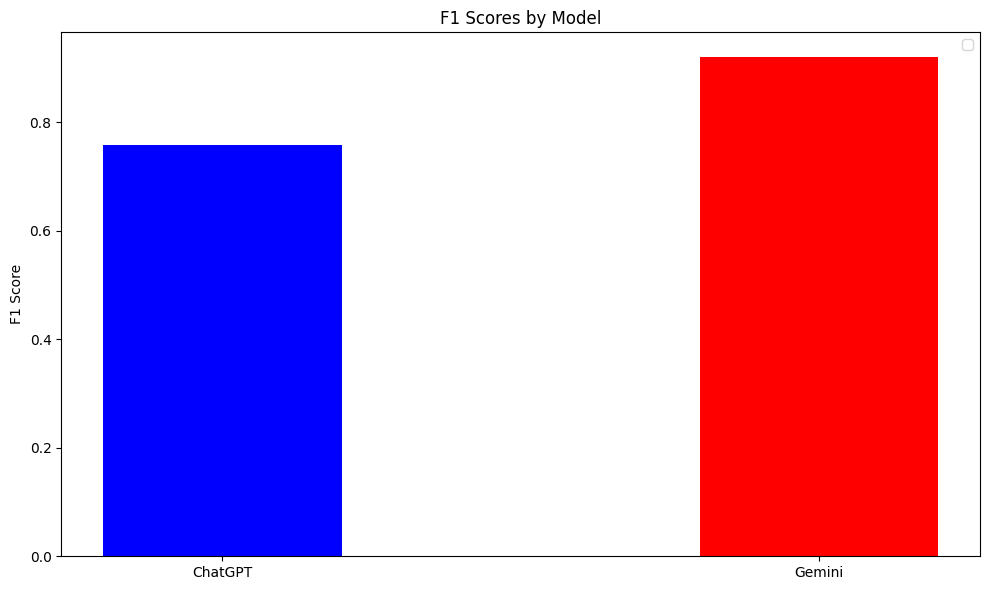

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = ["ChatGPT", "Gemini"]
f1_scores = [0.758, 0.92]
colors = ['blue', 'red']

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, f1_scores, width, color=colors)

ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# d) **Explainable AI**

In [ ]:
import json

labels = ["negative", "neutral", "positive"]
label_nums = [0, 1, 2]

k = 10

# Load train and test data
with open("/content/drive/MyDrive/Colab Notebooks/test.jsonl", "r") as test_file:
    test_data = [json.loads(line) for line in test_file]

exemplars = {label: [] for label in label_nums}
ground_truth_labels = []

# Populate exemplars with the first k values of each class
for entry in test_data:
    label = int(entry["label"])
    if label!=1 and len(exemplars[label]) < k:
        exemplars[label].append(entry["text"])
        ground_truth_labels.append(label)

ground_truth_labels.sort()

index_counter = 1

for label, values in exemplars.items():
    for value in values:
        print(f"{index_counter}) {value}")
        index_counter += 1

## **ChatGPT**

## **Prompt used**:
Act as a sentiment analyzer. Analyze the sentiment of all the provided tweets. The sentiment can either be positive or negative. Also explain the reasoning behind the classification
by highlighting specific words or phrases that influence the sentiment prediction.

## **ChatGPT response**:

Based on the provided tweets, here are the sentiment analyses:

Sentiment: Negative
Reasoning: Words like "pointless" and "infuriating" convey a negative sentiment towards the conversation about vegetarianism. Additionally, the hashtag #caveman implies frustration or backwardness.

Sentiment: Negative
Reasoning: Being blocked by someone (Flynn) and the use of "isn't too pleased" indicate a negative sentiment in this tweet.

Sentiment: Negative
Reasoning: The tweet seems critical and implies frustration or dissatisfaction with the situation described.

Sentiment: Negative
Reasoning: The tweet highlights a situation where Israel deems a comatose Gaza man a security threat, which suggests a negative view of Israel's actions in Gaza.

Sentiment: Negative
Reasoning: The tweet indicates impending military action in Mosul, suggesting a tense or negative situation.

Sentiment: Negative
Reasoning: The tweet expresses a negative sentiment towards Trump, using hashtags like #rejecttrump and #notmypresident, along with supporting movements like #blacklivesmatter.

Sentiment: Negative
Reasoning: The tweet opposes fracking and criticizes Cuadrilla, implying a negative sentiment towards their actions.

Sentiment: Negative
Reasoning: The tweet suggests concern about the future and implies a negative outlook on the world's dependence on fossil fuels.

Sentiment: Negative
Reasoning: The tweet criticizes society for being publicly distasteful, indicating a negative sentiment towards societal behavior.

Sentiment: Negative
Reasoning: The tweet expresses disapproval or incredulity towards Ben Carson's appointment for Housing & Urban Development.

Sentiment: Positive
Reasoning: The tweet compliments Vice President Pence, indicating a positive sentiment towards him.

Sentiment: Positive
Reasoning: The tweet expresses admiration for Pope Francis, indicating a positive sentiment towards him.

Sentiment: Neutral
Reasoning: The tweet provides information about Samsung's plans, without conveying a clear positive or negative sentiment.

Sentiment: Positive
Reasoning: The tweet praises the TV show Westworld, indicating a positive sentiment towards it.

Sentiment: Positive
Reasoning: The tweet expresses love for Chick-fil-A, indicating a positive sentiment towards the restaurant.

Sentiment: Neutral
Reasoning: The tweet seems informational without conveying a clear positive or negative sentiment.

Sentiment: Positive
Reasoning: The tweet expresses pride and support for the Trump transition team, indicating a positive sentiment towards them.

Sentiment: Positive
Reasoning: The tweet expresses gratitude or appreciation for working with someone named TK, indicating a positive sentiment towards them.

Sentiment: Positive
Reasoning: The tweet expresses approval or agreement with Microsoft's decision, indicating a positive sentiment towards it.

Sentiment: Positive
Reasoning: The tweet expresses enjoyment of the TV show Scream Queens, indicating a positive sentiment towards it.

## **Analysis**
I think ChatGPT did an amaxing job predicting the sentiment of each of the tweet. It did make a few neutral predictions even though I mentioned that the sentiment can be either positive or negative but the netral sentiment predictions felt accurate.

The explainations it provided for each tweets also felt very accurate.

So far for me ChatGPT has only performed poorly with few shot prompting but I feel that getting it to explain the reasoning behind each prediction made the model perform even better. The model predicted almost all the sentiments accurately with a few neutral sentiments.

## **Gemini**

## **Prompt used**:
Act as a sentiment analyzer. Analyze the sentiment of all the provided tweets. The sentiment can either be positive or negative. Also explain the reasoning behind the classification by highlighting specific words or phrases that influence the sentiment prediction.

## **Gemini response**:

Sentiment Analysis of Tweets:

**1. Negative**

* Reasoning: Words like "pointless," "infuriating," and "caveman" convey frustration and negativity towards the conversation.

**2. Negative**

* Reasoning: "Blocked" and "not pleased" indicate a negative interaction between the users.

**3. Negative**

* Reasoning: The tweet criticizes someone for "crying" and implies negativity towards "middle America."

**4. Negative**

* Reasoning: Phrases like "comatose," "needs treatment," and "security threat" highlight a concerning situation.
* Hashtag #Palestine suggests a potential conflict.

**5. Neutral**

* Reasoning: While the tweet mentions military action, it lacks emotional words and focuses on factual information.

**6. Negative**

* Reasoning: Hashtags like #rejecttrump and #nevertrump express disapproval towards Trump.

**7. Negative**

* Reasoning: Words like "fracking," "persecuting," "BankruptCuadrilla," and #ECOCIDE portray a negative view of a certain practice.

**8. Negative**

* Reasoning: "Crisis" and "run out" suggest a pessimistic outlook on the future.

**9. Negative**

* Reasoning: "Casually comfortable about being publicly distasteful" expresses disapproval of societal behavior. #deplorables is a negative term.

**10. Negative**

* Reasoning: Emojis  "" and "" indicate disappointment with Ben Carson's appointment.

**11. Positive**

* Reasoning: Phrases like "stand up guy" and "Gentleman" express positive qualities.

**12. Positive**

* Reasoning: The speaker feels comforted by Pope Francis and desires a hug, suggesting positive emotions.

**13. Neutral**

* Reasoning: This tweet conveys factual information about a software update.

**14. Positive**

* Reasoning: Words like "brilliant," "good," and "storytelling" express a positive evaluation of Westworld.

**15. Positive**

* Reasoning: Emoji "" and the name "Chick-fil-A" suggest positive feelings about fast food.

**16. Neutral**

* Reasoning: This tweet announces a news segment but doesn't express positive or negative sentiment.

**17. Positive**

* Reasoning: Hashtags like #TeamTrump and #MakeAmericaGreatAgain indicate support for Trump's team.

**18. Positive**

* Reasoning: "Lucky" and "get to work with" imply positive feelings about working with someone.

**19. Positive**

* Reasoning: "Big deal" and "smart move" suggest a positive assessment of Microsoft's action.

**20. Positive**

* Reasoning: All caps "SO SO GOOD" expresses strong positive feelings about the show.


## **Analysis**
Similar to ChatGPT I think Gemini also did a good job predicting the sentiments of the tweets provided. I think when the model has to explain it's decision it does much better at predicting. But there are insitances like the following reasoning given by gemini "Reasoning: While the tweet mentions military action, it lacks emotional words and focuses on factual information.", where the annotator might argue that a military action should make this a negative sentiment tweet but gemini thinks this is just factual information. This is completely subjective and the sentiment will differ with different viewpoints and it is something we need to consider with tasks like sentiment analysis.